<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP (Part 2/2)

**Note**: This is a part 2 of Project 3.

### Contents:
- [Data Cleaning & EDA](#Data-Cleaning-&-EDA)
- [Preprocessing & Modeling](#Preprocessing-&-Modeling)
- [Evaluation and Conceptual Understanding](#Evaluation-and-Conceptual-Understanding)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data Cleaning & EDA

In [1]:
# Import libaries
import pandas as pd       
import numpy as np
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from prettytable import PrettyTable
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# see more characters in a column
pd.options.display.max_colwidth = 400

In [2]:
#read Aliens post
df_aliens = pd.read_csv('aliens_raw')
print(df_aliens.shape)
df_aliens.head()

(2100, 82)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,author_flair_template_id,author_flair_text_color,media_metadata,is_gallery,author_cakeday,author_flair_background_color,edited,banned_by,gilded,gallery_data
0,[],False,TV_quirks,NaN,[],NaN,text,t2_h1gmxqqf,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Outrageous_Resist447,NaN,[],NaN,text,t2_daj28e5r,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Otherwise-Book-5327,NaN,[],NaN,text,t2_8uxu5a93,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,SilentConsciou5,NaN,[],NaN,text,t2_cdee3vc1,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,gamerjam,NaN,[],NaN,text,t2_14i9x9,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#read Space posts
df_space = pd.read_csv('space_raw')
print(df_space.shape)
df_space.head()

(2100, 80)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,removed_by_category,media_metadata,gallery_data,is_gallery,author_flair_background_color,author_flair_text_color,banned_by,author_cakeday,suggested_sort,link_flair_template_id
0,[],False,finngraeff,NaN,[],NaN,text,t2_2l6bwd5n,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,DygonZ,NaN,[],NaN,text,t2_14n14g,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,AstroSam1902,NaN,[],NaN,text,t2_fnme3jo2,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,EdwardHeisler,NaN,[],NaN,text,t2_l5xw626,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,shhmikis,NaN,[],NaN,text,t2_6pvendfn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#merge Aliens and Space posts into single dataframe
df = pd.concat([df_aliens,df_space])
df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,author_flair_text_color,media_metadata,is_gallery,author_cakeday,author_flair_background_color,edited,banned_by,gilded,gallery_data,suggested_sort
0,[],False,TV_quirks,NaN,[],NaN,text,t2_h1gmxqqf,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Outrageous_Resist447,NaN,[],NaN,text,t2_daj28e5r,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Otherwise-Book-5327,NaN,[],NaN,text,t2_8uxu5a93,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,SilentConsciou5,NaN,[],NaN,text,t2_cdee3vc1,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,gamerjam,NaN,[],NaN,text,t2_14i9x9,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#retain only useful features
df = df[["title","selftext","subreddit"]]

In [6]:
print(df.shape)
df

(4200, 3)


,title,selftext,subreddit
0,"Supergroup 1917: ""how telegram.org is raising me""",NaN,aliens
1,Stanton Friedman Discusses Stephen Hawking &amp; SETI,NaN,aliens
2,Kind of foolish but I got very scared after I saw this photo I took off my window just to realize it is just a reflection off my lamp,NaN,aliens
3,Aliens troll and gaslight on the internet all the time.,One of them probably even tea-bagged you in a video game and you didn't even know it was them. They have always been around and use our tech like anyone else.,aliens
4,Are there any youtube channels that look at aliens sigtings or evidence from a skeptical view?,Like trying to figure out what it is and not immediately jumping to aliens but going in depth on analyzing everything about it.,aliens
...,...,...,...
2095,Space Force celebrates second anniversary as arms race in space heats up,NaN,space
2096,Engine Computer Problem Delays First SLS Launch,NaN,space
2097,Satellites integration in PICOBUS pocket-satellite deployer for the second flight of Firefly Alpha launch is now live,NaN,space
2098,What’s the best location to watch crs-24,NaN,space


**Interpretation**: aliens posts and space posts has been merged with aliens posts on top and space posts at the bottom.

In [7]:
df.notna().sum()

title        4200
selftext     1848
subreddit    4200
dtype: int64

In [8]:
#remove "[removed]" in posts
df = df.replace("[removed]", np.nan)

In [9]:
#remove "[deleted]" in posts
df = df.replace("[deleted]", np.nan)

In [10]:
#remove empty value in "selftext" column
df = df.dropna(subset=["selftext"])

In [11]:
#reset index after remove empty cell
df.reset_index(drop = True, inplace=True)

In [12]:
#check that all remaining documents are without null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1600 non-null   object
 1   selftext   1600 non-null   object
 2   subreddit  1600 non-null   object
dtypes: object(3)
memory usage: 37.6+ KB


In [13]:
#combine "title" and "selftext" column together, since title may add value in differentiating posts into subreddit
df["post"] = df["title"]+ " " + df["selftext"]

In [14]:
# check word count for each post
df["post_count"] = df["post"].map(lambda x: len(x))

In [15]:
# map aliens as "1" and space as "0"
df["subreddit"] = df["subreddit"].map({"aliens":1, "space":0})

In [16]:
df

,title,selftext,subreddit,post,post_count
0,Aliens troll and gaslight on the internet all the time.,One of them probably even tea-bagged you in a video game and you didn't even know it was them. They have always been around and use our tech like anyone else.,1,Aliens troll and gaslight on the internet all the time. One of them probably even tea-bagged you in a video game and you didn't even know it was them. They have always been around and use our tech like anyone else.,215
1,Are there any youtube channels that look at aliens sigtings or evidence from a skeptical view?,Like trying to figure out what it is and not immediately jumping to aliens but going in depth on analyzing everything about it.,1,Are there any youtube channels that look at aliens sigtings or evidence from a skeptical view? Like trying to figure out what it is and not immediately jumping to aliens but going in depth on analyzing everything about it.,222
2,What are the current hot topics in alien discussion?,I write as I started browsing this sub this week.\n\nBack in 2006 when I was middle school I got bored online and started looking up UFO stuff. The old websites are hide to find but I found a lot of cool photos. \n\nI used to read those strange mysteries books that were dedicated to different states and they have a bunch of cool lesser known stories. \n\nAround 2007 or 2008 I heard of the 2012...,1,What are the current hot topics in alien discussion? I write as I started browsing this sub this week.\n\nBack in 2006 when I was middle school I got bored online and started looking up UFO stuff. The old websites are hide to find but I found a lot of cool photos. \n\nI used to read those strange mysteries books that were dedicated to different states and they have a bunch of cool lesser known...,1717
3,everything “woo woo” about the way UAPs behave/appear to us humans could be explained by a technology millions of years ahead of our own,"I see a lot of opinions on this sub and in general of these UAPs being interdimensional, ultra dimensional, from another reality, etc. due to how they seem to behave. but it could just be our puny human minds trying to rationalize a technology that seems magical or “woo”.\n\nknowing what we know about the universe only being 13 billion years old, it seems to me that it’s *far* more likely thei...",1,"everything “woo woo” about the way UAPs behave/appear to us humans could be explained by a technology millions of years ahead of our own I see a lot of opinions on this sub and in general of these UAPs being interdimensional, ultra dimensional, from another reality, etc. due to how they seem to behave. but it could just be our puny human minds trying to rationalize a technology that seems magi...",820
4,Do you think that if an alien civilization is capable of speed of light travel that they should also probably be capable of time travel and/or inter dimensional travel just based on how technologically advanced they would have to be?,"Just an afterthought, as an example this could explain that a lot of UFO sightings could be us from the future..",1,"Do you think that if an alien civilization is capable of speed of light travel that they should also probably be capable of time travel and/or inter dimensional travel just based on how technologically advanced they would have to be? Just an afterthought, as an example this could explain that a lot of UFO sightings could be us from the future..",346
...,...,...,...,...,...
1595,I have a question?,"I’m not a scientist in the slightest but would it be possible for dark energy to hide a planet in plain sight?, I was watching a video on YouTube called “gravity visualized” and when he brings up dark energy, I was was wondering if that also effected light? And if so could it be possible to hide a planet (relatively) near ours?\n(Video I was referring to\/)\nhttps://youtu.be/MTY1Kje0yLg",0,"I have a question? I’m not a scientist in the slightest but would it be possible for dark energy to hide a

In [17]:
#group post by "aliens" and "space" for statistical analysis
subreddit = df.groupby("subreddit")

In [18]:
subreddit

In [19]:
subreddit.describe()

post_count                                                        \
               count         mean          std   min    25%    50%     75%   
subreddit                                                                    
0              537.0   516.903166   631.053911  31.0  196.0  340.0   553.0   
1             1063.0  1177.985889  2521.865403  14.0  266.0  584.0  1161.0   

                    
               max  
subreddit           
0           5877.0  
1          36454.0

**Interpretation**: There are more aliens post than space posts, hence accuracy may not be the best metrics to evaluate model. Generally aliens have more word count in posts than space posts.

<AxesSubplot:title={'center':'Mean word count by subreddit'}, xlabel='subreddit', ylabel='post_count'>

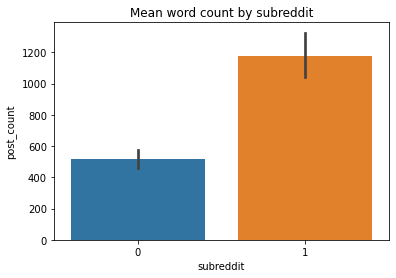

In [20]:
plt.title("Mean word count by subreddit")
sns.barplot(data = df, x="subreddit", y="post_count")


([<matplotlib.axis.XTick at 0x7fa4b99aec10>,
 [Text(0, 0, ''), Text(0, 0, '')])

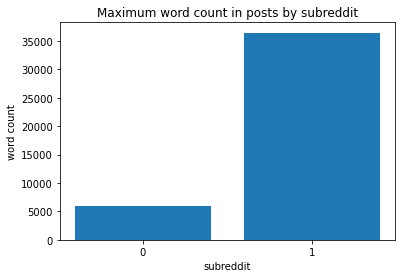

In [21]:
plt.bar(data = subreddit, x = df["subreddit"], height = df["post_count"])
plt.title("Maximum word count in posts by subreddit")
plt.xlabel("subreddit")
plt.ylabel("word count")
plt.xticks([0,1])


**Interpretation**: Alien posts has a lot more average word count than Space posts, the maximum word count also higher in aliens than space posts. 

Text(0.5, 1.0, 'Outlier by subreddit')

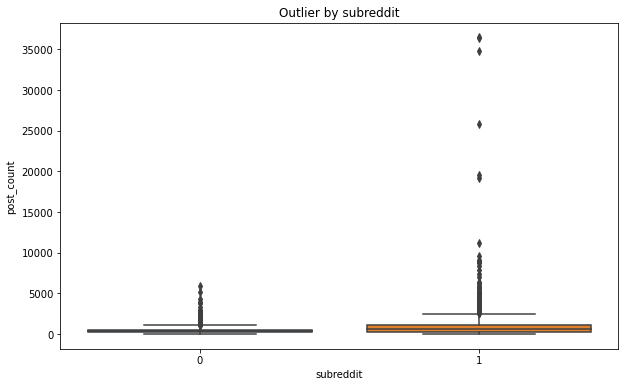

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df["subreddit"], y=df["post_count"])
plt.title("Outlier by subreddit")

**Interpretation**: Aliens posts have significant outliers in term of word count. Explore these extra long posts to see whether they are genuine posts. 

In [23]:
#filter posts with more than 10,000 word counts to explore whether they are spam or valid posts
df[df["post_count"]>10000]

,title,selftext,subreddit,post,post_count
273,Following Lue's Breadcrumbs To Some Deep Physics,TLDR; The breadcrumbs dropped by the disclosure team might have a strong tie to the time component of the [time evolution operator](https://i.postimg.cc/Wpy96bzJ/imaginary-evolution.png) of quantum mechanical systems.\n\n\nDisclosure: I am not a physicist.\n\n\nLue has stated twice that he leaves breadcrumbs in every interview.\n\n21OCT2021 - Theories of Everything with Lue\nhttps://youtu.be/q...,1,Following Lue's Breadcrumbs To Some Deep Physics TLDR; The breadcrumbs dropped by the disclosure team might have a strong tie to the time component of the [time evolution operator](https://i.postimg.cc/Wpy96bzJ/imaginary-evolution.png) of quantum mechanical systems.\n\n\nDisclosure: I am not a physicist.\n\n\nLue has stated twice that he leaves breadcrumbs in every interview.\n\n21OCT2021 - Th...,19240
423,I met Tom Delonge and Luis Elizondo and these are my thoughts.,"First, full disclosure. I am a US Army Counterintelligence Agent. This will be the first time I've posted something on Reddit in the 10 years I've been here that runs the risk of someone being able to figure out who I am based on the story I'm about to tell, but I'm nearly retired, so I think I'm probably alright.\n\nI want to start with a disclaimer. I know, having read a ton of books and wat...",1,"I met Tom Delonge and Luis Elizondo and these are my thoughts. First, full disclosure. I am a US Army Counterintelligence Agent. This will be the first time I've posted something on Reddit in the 10 years I've been here that runs the risk of someone being able to figure out who I am based on the story I'm about to tell, but I'm nearly retired, so I think I'm probably alright.\n\nI want to star...",11149
787,Missing 411: Were American Farmers Abducted By UFOs?,"David Paulides' first Missing 411 book is called *Eastern United States - Unexplained disappearances of North Americans that have never been solved* and it was released in 2011. Its main focus is American farmers who went missing under strange circumstances. \n\n**Why farmers?**\n\nAccording to David Paulides *""farmers in North America represent a specific group of the missing person phenomeno...",1,"Missing 411: Were American Farmers Abducted By UFOs? David Paulides' first Missing 411 book is called *Eastern United States - Unexplained disappearances of North Americans that have never been solved* and it was released in 2011. Its main focus is American farmers who went missing under strange circumstances. \n\n**Why farmers?**\n\nAccording to David Paulides *""farmers in North America repre...",25869
866,"Transcript of Chris Bledsoe's regression with Barbara Lamb. June 5th, 2018. San Diego.","**-This is a sacred text, a modern hymn to the Creator-**\n\n***B: Barbara***\n\n***C: Chris***\n\nB: Now, you’re getting ready to experience the whole of the experience when the lady came in 2012, what is it that you’re aware of? And Chris, as your sleeping there, is your wife sleeping in the bed there with you?\n\nC: no, no I’m alone\n\nB: do you sense your self being in bed alone?\n\nC: ye...",1,"Transcript of Chris Bledsoe's regression with Barbara Lamb. June 5th, 2018. San Diego. **-This is a sacred text, a modern hymn to the Creator-**\n\n***B: Barbara***\n\n***C: Chris***\n\nB: Now, you’re getting ready to experience the whole of the experience when the lady came in 2012, what is it that you’re aware of? And Chris, as your sleeping there, is your wife sleeping in the bed there wit...",36454
969,Are we ready? Can we change our mindset? Can we live without the systems we now know as staples?,"As researchers, we spend much time and effort investigating the phenomenon of UFOs. Given the preponderance of evidence many of us have come to make one simple conclusion: There is definitely something happening in the skies over the entire planet. \nTwo possible deductions can be gleaned from such numerous observations. 1) The observed phe

In [24]:
df.iloc[969]["post"]

'Are we ready? Can we change our mindset? Can we live without the systems we now know as staples? As researchers, we spend much time and effort investigating the phenomenon of UFOs. Given the preponderance of evidence many of us have come to make one simple conclusion: There is definitely something happening in the skies over the entire planet.  \nTwo possible deductions can be gleaned from such numerous observations. 1) The observed phenomenon is a technology so far advanced they must be coming from a distant alien civilization which is able to use technology far advanced from what we currently have publicly available, and 2) The observed phenomenon are Earthbound technologies which have been suppressed for many years while the technology is developed in secret “black budget projects” for military purposes.  \nThere are pundits in both these camps. No matter what the truth is, the general population is NOT getting the whole story. In reality the most probable situation is a composite 

In [25]:
df.iloc[970]["post"]

'Are we ready? Can we change our mindset? Can we live without the systems we now know as staples? [https://www.academia.edu/5230816/Are\\_we\\_really\\_ready\\_for\\_Dosclosure](https://www.academia.edu/5230816/Are_we_really_ready_for_Dosclosure)\n\n As researchers, we spend much time and effort investigating the phenomenon of UFOs. Given the preponderance of evidence many of us have come to make one simple conclusion: There is definitely something happening in the skies over the entire planet.  \nTwo possible deductions can be gleaned from such numerous observations. 1) The observed phenomenon is a technology so far advanced they must be coming from a distant alien civilization which is able to use technology far advanced from what we currently have publicly available, and 2) The observed phenomenon are Earthbound technologies which have been suppressed for many years while the technology is developed in secret “black budget projects” for military purposes.  \nThere are pundits in bot

In [26]:
df.drop(index=970, inplace=True)

**Action done**: Selectively explore posts more than 10,000 words, and noted the 2 longest posts are valid posts but duplicated. Hence remove the longest and keep all remaining posts even though they are exceptionally long, but still contain useful information. 

In [27]:
#split the aliens posts and space posts to further analysis their respective characteristics
df_aliens = df[df["subreddit"]==1]
df_space = df[df["subreddit"] ==0]

In [28]:
df_aliens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1062
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1062 non-null   object
 1   selftext    1062 non-null   object
 2   subreddit   1062 non-null   int64 
 3   post        1062 non-null   object
 4   post_count  1062 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 49.8+ KB


In [29]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 1063 to 1599
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       537 non-null    object
 1   selftext    537 non-null    object
 2   subreddit   537 non-null    int64 
 3   post        537 non-null    object
 4   post_count  537 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 25.2+ KB


**Interpretation**: Notice the distribution of aliens and space posts is not balanced, hence accuracy will not be the best metrics and F1 score will be used for evaluation. This is consistent with the problem statement. 

In [30]:
#combine all aliens post and space posts into a large single string of text respectively
aliens_text = ' '.join(word for word in df_aliens["post"])
space_text = ' '.join(word for word in df_space["post"])

Text(0.5, 1.0, 'wordcloud for Aliens posts')

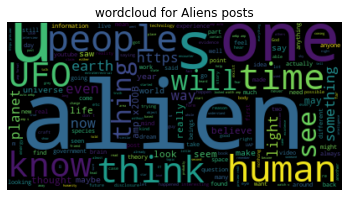

In [31]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(aliens_text)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("wordcloud for Aliens posts")

Text(0.5, 1.0, 'wordcloud for Space posts')

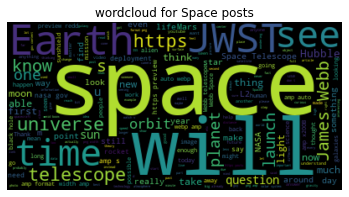

In [32]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(space_text)
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("wordcloud for Space posts")

**Interpretation**: Based on wordcloud, noted each subreddit has its own unique words.  
Aliens posts contain "alien", "ufo", "people", "human", "one".  
Space posts contain "space", "earth", "JWST, "will", "time".   
Hence, the problem statement can likely be answered based on data extracted. 

Data Cleaning and EDA

- Are missing values imputed/handled appropriately?  
Ans: removed missing values. 
- Are distributions examined and described?  
Ans: Noted distribution is not balanced, hence accuracy is not the best metrics for evaluation.  
- Are outliers identified and addressed?  
Ans: Checked outliers and remove duplicated posts only because longer posts are still valid posts. 
- Are appropriate summary statistics provided?  
Ans: Yes, checked mean and max word count and percentile. 
- Are steps taken during data cleaning and EDA framed appropriately?  
Ans: Yes.
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?  
Ans: Used wordcloud to illustrate different common words used in respective posts. 

## Preprocessing & Modeling

### Data Dictionary


|Feature|Type|Description|
|---|---|---|
|title|*object*|title of the post| 
|selftext|*object*|text of the post| 
|reddit|*bool*|1 = aliens| 
|post|*object*|title + selftext| 

In [33]:
#assign X and y as feature and result
X = df["post"]
y = df["subreddit"]

In [34]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
#instantiate TFIDF
tvec = TfidfVectorizer()

In [36]:
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), columns=tvec.get_feature_names_out())
X_train_df

,00,000,000ly,000yrs,0021,005,00dc7f88d28ce6c5c2549c60b489225c62023b93,01,01011,013,...,非法之事已被专业人士和砸郭派揭批的体无完肤,项目上线阶梯,项目仅仅上线一月,风头一时无两,馅饼就会从天下落下,高达2亿多的欠债加罚款,鸡体味,鸡币,鸡系列,黄金挂钩
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Interpretation**: Notice there are chinese charaters, will further clean data to remove non-english words. 

In [37]:
#make all posts to lower case
df["post"] = df["post"].map(lambda x: x.lower())

In [38]:
tokenizer = RegexpTokenizer('[a-z]\w+')

In [39]:
#Use Regex Tokenizer to remove non-english words
df["post"] = df["post"].map(lambda x: tokenizer.tokenize(x))

In [40]:
#Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [41]:
#create new column for lemmatized words
df["post"] = df["post"].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

**Rationale**: Decided to only lemmatize and not to stem the posts, because stemming the words may produce non-english words which is difficult to interpret when analysing top words.

In [42]:
#exclude stop words in all posts
df["post"] =  df["post"].apply(lambda x: [i for i in x if i not in stopwords.words("english")]).str.join(' ')

In [44]:
#re-assign X and y after preprocessing
X = df["post"]
y = df["subreddit"]

In [45]:
#turn on stratify because the distribution of y is not balanced
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [46]:
X_train.shape

(1199,)

In [47]:
y.value_counts(normalize=True)

1    0.664165
0    0.335835
Name: subreddit, dtype: float64

**Interpretation**: Confirmed distribution of y is consistent with distribution noted in data cleaning, i.e. aliens posts have higher proportion. 

In [48]:
#pipeline TFIDF with MNB
tvc_pipe = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('mb', MultinomialNB())
])

In [49]:
#pipeline TFIDF with Random Forest
rf_pipe = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('rf', RandomForestClassifier())
])

In [50]:
#pipeline TFIDF with Logistic Regression
logistic_pipe = Pipeline([
    ('tvec', TfidfVectorizer()), 
    ('logistic', LogisticRegression())
])

In [51]:
#pipeline TFIDF with MNB
cvec_pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('mb', MultinomialNB())
])

In [52]:
#pipeline TFIDF with Random Forest
cvec_rf = Pipeline([
    ('cvec', CountVectorizer()), 
    ('rf', RandomForestClassifier())
])

In [53]:
#pipeline TFIDF with Logistic Regression
cvec_log = Pipeline([
    ('cvec', CountVectorizer()), 
    ('logistic', LogisticRegression())
])

In [54]:
#fit all pipeline models to train data
tvc_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
logistic_pipe.fit(X_train, y_train)
cvec_pipe.fit(X_train, y_train)
cvec_rf.fit(X_train, y_train)
cvec_log.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('logistic', LogisticRegression())])

In [55]:
t = PrettyTable(["Model", "Train score", "Test score", "f1 score"])
t.add_row(["TFIDF, MNB", round(tvc_pipe.score(X_train, y_train),2),round(tvc_pipe.score(X_test, y_test),2),round(f1_score(y_test, tvc_pipe.predict(X_test)), 2) ])
t.add_row(["TFIDF, RF", round(rf_pipe.score(X_train, y_train),2),round(rf_pipe.score(X_test, y_test),2), round(f1_score(y_test, rf_pipe.predict(X_test)),2) ])
t.add_row(["TFIDF, Logistic", round(logistic_pipe.score(X_train, y_train),2),round(logistic_pipe.score(X_test, y_test),2), round(f1_score(y_test, logistic_pipe.predict(X_test)),2) ])
t.add_row(["Cvec, MNB", round(cvec_pipe.score(X_train, y_train),2),round(cvec_pipe.score(X_test, y_test),2), round(f1_score(y_test, cvec_pipe.predict(X_test)),2) ])
t.add_row(["Cvec, RF", round(cvec_rf.score(X_train, y_train),2),round(cvec_rf.score(X_test, y_test),2), round(f1_score(y_test, cvec_rf.predict(X_test)),2) ])
t.add_row(["Cvec, Logistic", round(cvec_log.score(X_train, y_train),2),round(cvec_log.score(X_test, y_test),2), round(f1_score(y_test, cvec_log.predict(X_test)),2) ])
print(t)

+-----------------+-------------+------------+----------+
|      Model      | Train score | Test score | f1 score |
+-----------------+-------------+------------+----------+
|    TFIDF, MNB   |     0.85    |    0.79    |   0.86   |
|    TFIDF, RF    |     1.0     |    0.92    |   0.94   |
| TFIDF, Logistic |     0.95    |    0.89    |   0.92   |
|    Cvec, MNB    |     0.96    |    0.91    |   0.94   |
|     Cvec, RF    |     1.0     |    0.92    |   0.94   |
|  Cvec, Logistic |     1.0     |    0.92    |   0.94   |
+-----------------+-------------+------------+----------+


**Interpretation**: All models test scores and F1 scores are quite high at around 90% except for MultinomialNB with TFIDF have lower score. 

Logistic Regression's gap between train and test score is around 6%-8% which is similar to other models, which indicates low variance and potentially will work well with new unseen data. Logistic regression also has the best interpretability. Hence, will use Logistic Regression model as baseline model.  
  
Logistic Regression is actually a regression model although we are using it for classification problem. Each word has its own Logistic Regression coefficient that contributes the classification as "aliens" or "space". Although Logistic Regression does not handle non linear features well, it did good in our case.

Preprocessing and Modeling

- Is text data successfully converted to a matrix representation?  
Ans: Yes.
- Are methods such as stop words, stemming, and lemmatization explored?  
Ans: Yes, stop words and lemmatization. 
- Does the student properly split and/or sample the data for validation/training purposes?  
Ans: Yes
- Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: Random Forest and one other model)?  
Ans: Yes. MNB, Random Forest and Logistic Regression.  
- Does the student defend their choice of production model relevant to the data at hand and the problem?  
Ans: Yes, used Logistic Regression because of its score is good and easier interpretation.
- Does the student explain how the model works and evaluate its performance successes/downfalls?  
Ans: Yes. Evaluate the how logistic regression works how to evaluate its performance. 

## Evaluation and Conceptual Understanding

In [56]:
#indicate parameters for tuning
tf_params = {
 'tvec__max_features':[100, 2000, 3000 ,4000],
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tvec__stop_words': [None, 'english'], 
    'logistic__solver': ['liblinear'],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__C': [1, .8, .6]
}

In [57]:
#indicate parameters for tuning
cv_params = {
 'cvec__max_features':[100, 2000, 3000 ,4000],
 'cvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'cvec__stop_words': [None, 'english'], 
    'logistic__solver': ['liblinear'],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__C': [1, .8, .6]
}

In [58]:
tvc_log_gs = GridSearchCV(logistic_pipe, param_grid=tf_params, cv = 3, verbose=1)

In [59]:
cvc_log_gs = GridSearchCV(cvec_log, param_grid=cv_params, cv = 3, verbose=1)

In [60]:
tvc_log_gs.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [1, 0.8, 0.6],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear'],
                         'tvec__max_features': [100, 2000, 3000, 4000],
                         'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [61]:
cvc_log_gs.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'cvec__max_features': [100, 2000, 3000, 4000],
                         'cvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'logistic__C': [1, 0.8, 0.6],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear']},
             verbose=1)

In [62]:
t = PrettyTable(["Model", "Train score", "Test score", "F1_score"])
t.add_row(["TFIDF, Logistic", round(tvc_log_gs.score(X_train, y_train),2),round(tvc_log_gs.score(X_test, y_test),2),round(f1_score(y_test, tvc_log_gs.predict(X_test)),2)])
t.add_row(["Cvec, Logistic", round(cvc_log_gs.score(X_train, y_train),2),round(cvc_log_gs.score(X_test, y_test),2),round(f1_score(y_test, cvc_log_gs.predict(X_test)),2)])

print(t)

+-----------------+-------------+------------+----------+
|      Model      | Train score | Test score | F1_score |
+-----------------+-------------+------------+----------+
| TFIDF, Logistic |     0.89    |    0.91    |   0.93   |
|  Cvec, Logistic |     0.99    |    0.92    |   0.94   |
+-----------------+-------------+------------+----------+


**Interpretation**: Notice after tuning the parameters, the test score and F1 score have improved.   
Although the model Logistic Regression with TFIDF has the lower train and test score, it has the lowest gap between train and test score (i.e. 2%), which indicates low variance and potentially will work well with new unseen data. Given that the model is evaluated based on unseen data, will use Logistic Regression with TFIDF as production model. 

In [63]:
#get feature name
log_name = logistic_pipe[0].get_feature_names_out()

In [64]:
#get coefficient from logistic regression model
log_cof = logistic_pipe[1].coef_[0]

In [65]:
# zip together the feature name and its coefficient
log_imp = zip(log_name, log_cof)

In [66]:
# convert into data frame
log_data = pd.DataFrame(log_imp, columns=["feature", "coef"])

In [67]:
log_data.sort_values("coef", ascending=False)

,feature,coef
296,alien,4.867595
10363,ufo,2.754467
4831,human,1.802752
9322,specie,1.718990
10000,think,1.593937
...,...,...
5731,launch,-1.934974
10895,webb,-2.266114
9883,telescope,-2.717148
5556,jwst,-3.496413


**Interpretation**: 
Aliens posts contain words like aliens, ufo, specie(s), human, extraterrestrial etc. It means the discussion is surrounded exploring the possible existence of aliens that represents another species as compared to normal people (human).

Space posts on the other hand, contain space, telescope, launch, jwst ( James Webb Space Telescope ), moon, sun, etc. These words are words that represent more factual topics, like the recent launch of the James Webb Space Telescope into space.

The words with highest and lowest coefficient are within our expectation based on our domain knowledge on UFO and space. 

In [68]:
# create new column to show odds which is converted from coefficient
log_data["odds"] = log_data["coef"].apply(lambda x: np.exp(x))

In [69]:
log_data.sort_values("coef", ascending=False)

,feature,coef,odds
296,alien,4.867595,130.007807
10363,ufo,2.754467,15.712656
4831,human,1.802752,6.066317
9322,specie,1.718990,5.578891
10000,think,1.593937,4.923092
...,...,...,...
5731,launch,-1.934974,0.144428
10895,webb,-2.266114,0.103714
9883,telescope,-2.717148,0.066063
5556,jwst,-3.496413,0.030306


**Interpretation**: To interpret coefficient of Logistic Regression, the coefficient needs to be "exponentiated" to be odds. Odds > 0 means more likely to be classified as "aliens", while odds < 0 means more likely to be classified as "space". For example, the feature "aliens" has odds of 153, meaning holding all other variable constant, the existence of word "aliens" will increase the odds 153 times to be classified as "aliens". 

In [70]:
#create a new column for absolute value of coefficient 
log_data["abs_value"] = log_data["coef"].map(lambda x: abs(x))
#create a new column to show different color for coefficient below and above 0
log_data["color"] = log_data["coef"].map(lambda x: "green" if x > 0 else "red")

In [71]:
log_data = log_data.sort_values("abs_value", ascending=False)


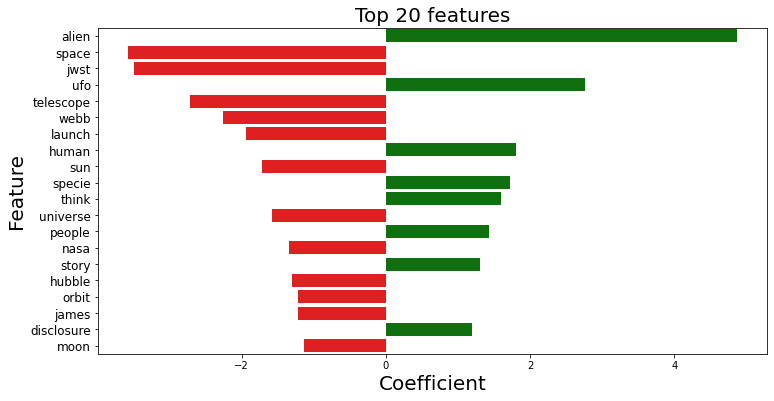

In [72]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = "coef", y= "feature", data = log_data.head(20), palette= log_data["color"].head(20) )
ax.set_title("Top 20 features", fontsize = 20)
ax.set_xlabel("Coefficient", fontsize = 20)
ax.set_ylabel("Feature", fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(),fontsize =12);

Text(0.5, 1.0, 'Confusion matrix Logistic Regression model')

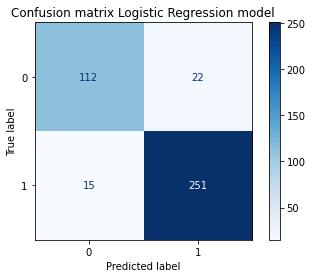

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, tvc_log_gs.predict(X_test), cmap="Blues")
plt.title("Confusion matrix Logistic Regression model")

**Interpretation:** The model has higher false positive (22) than false negative (15). It means more space posts are wrongly classified as aliens posts than aliens posts wrongly classified as space posts (Positive refers to aliens post). Given the purpose of the classification is for marketing purpose, the higher error of false positive means marketing effort on UFO could have wrongly directed to space, potentially targeting the wrong interest group.    

Anyway, lower false negative is still desirable in this case because it means the marketing effort rarely "missed" its intended target group. 

Evaluation and Conceptual Understanding

- Does the student accurately identify and explain the baseline score?  
Ans: Yes, explained Logistic Regression as baseline score
- Does the student select and use metrics relevant to the problem objective?  
Ans: Yes, calculated accuracy and F1 score.
- Does the student interpret the results of their model for purposes of inference?   
Ans: Yes, explained F1 score in the context of marketing 
- Is domain knowledge demonstrated when interpreting results?  
Ans: Yes, analysed highest and lowest coefficient words and explained why words with highest and lowest logistic regression are within expectation. 
- Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?  
Ans: Explained what logistic coefficient means. 

## Conclusions and Recommendations

Based on top coefficient words, the model is able to classify aliens posts from space posts with high accuracy and low false positive/false negative. It is clear that UFO enthusiasts are interested in finding out how different aliens are, if they exist, when compared to us as human being. Hence, if MIB wants to capture the attention of UFO enthusiasts, words such as "aliens", "UFO", "human", "people", "species" must be used in marketing effort. For example: "Just like the human species, maybe aliens driving the UFO are also constantly thinking what to eat later".   

UFO enthusiasts can also have a high level feeling of what other UFO enthusiasts are discussing currently, since the top coefficient words may change if the web scrapping scope is extended to more posts or is done at a different time eg. 10 years earlier. We are able to monitor what are the key focus when people discuss aliens over a long period of time. 

For future steps, we can include sentiment analysis and topic modelling. Sentiment analysis can help to identify whether people are feeling positive or negative on aliens, perhaps MIB will disclose what they know about aliens if the positivity has reached certain level. Topic modelling can help to identify the specific topics people are discussing on aliens, it would help MIB in narrowing down the topic to focus in marketing materials. 

Conclusion and Recommendations

- Does the student provide appropriate context to connect individual steps back to the overall project?  
Ans: Yes
- Is it clear how the final recommendations were reached?   
Ans: Yes
- Are the conclusions/recommendations clearly stated?  
Ans: Yes
- Does the conclusion answer the original problem statement?  
Ans: Yes, identified top words.
- Does the student address how findings of this research can be applied for the benefit of stakeholders?  
Ans: Yes both MIB and secondary stakeholders.
- Are future steps to move the project forward identified?  
Ans: Sentiment analysis and topic modelling. 